In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 학습용 데이터 (기존 개체)
# 입력
x_train = np.array([
                   [25, 25],
                   [33, 30],
                   [38, 30],
                   [45, 35],
                   [28, 40]])
# 라벨
y_train = np.array([0, 0, 1, 1, 0])

In [3]:
# 테스트용 데이터(새로운 개체)
# 입력
x_test = np.array([[30, 35]])

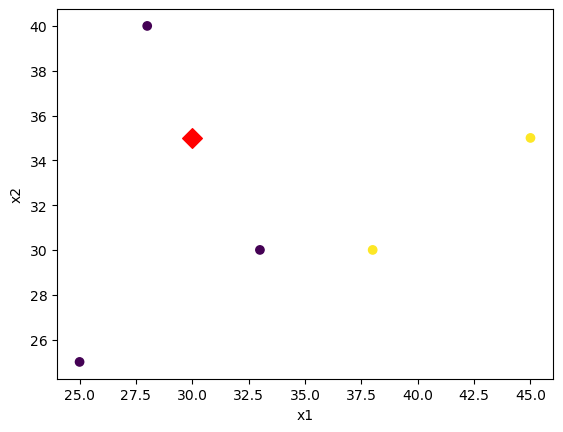

In [4]:
# 산포도 
# 학습용 데이터
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
# 테스트용 데이터
plt.scatter(x_test[:,0], x_test[:, 1], c='red', marker='D', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 분류

In [5]:
# 피쳐 스케일링:학습용 데이터
scalerX = StandardScaler()
scalerX.fit(x_train)
x_train_std = scalerX.transform(x_train)
print(x_train_std)

[[-1.23272999 -1.37281295]
 [-0.11206636 -0.39223227]
 [ 0.58834841 -0.39223227]
 [ 1.56892908  0.58834841]
 [-0.81248113  1.56892908]]


In [6]:
# 피처 스케일링: 테스트용 데이터
x_test_std =scalerX.transform(x_test)
print(x_test_std)

[[-0.53231522  0.58834841]]


In [7]:
# 모형화
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
# 학습
knn.fit(x_train_std, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [8]:
# 예측
pred = knn.predict(x_test_std)
print(pred)

[0]


In [9]:
# 클래스별 확률 값을 반환
knn.predict_proba(x_test_std)

array([[0.66666667, 0.33333333]])

In [10]:
# 인접한 K개의 개체들에 대한 거리와 색인 반환
dist, index = knn.kneighbors(x_test_std)
print(dist)
print(index)

[[1.0198193  1.06683999 1.48910222]]
[[4 1 2]]


## 회귀

In [34]:
# 입력
x_train = np.array([
                   [25, 25],
                   [33, 30],
                   [38, 30],
                   [45, 35],
                   [28, 40]])

# 피쳐 스케일링: 학습용 데이터
# 입력값
scalerX = StandardScaler()
scalerX.fit(x_train)
x_train_std = scalerX.transform(x_train)
print(x_train_std)

# 라벨
y_train = np.array([[10], [20], [30], [40], [50]])

# 목표값
scalerY = StandardScaler()
scalerY.fit(y_train)
y_train_std = scalerY.transform(y_train)
print(y_train_std)

[[-1.23272999 -1.37281295]
 [-0.11206636 -0.39223227]
 [ 0.58834841 -0.39223227]
 [ 1.56892908  0.58834841]
 [-0.81248113  1.56892908]]
[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


In [35]:
# 피쳐 스케일링: 테스트용 데이터
x_test_std = scalerX.transform(x_test)
print(x_test_std)

[[-0.53231522  0.58834841]]


In [39]:
# 모형화
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform')
y_train_std = y_train_std.ravel()
print(y_train_std)
# 학습
knn.fit(x_train_std, y_train_std)

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


ValueError: Unknown label type: 'continuous'

In [23]:
# 예측
y_pred = knn.predict(x_test_std)
print(y_pred)

AttributeError: 'KNeighborsClassifier' object has no attribute 'n_samples_fit_'

In [ ]:
# 예측 값의 역변환
y_pred_inverse = scalerY.inverse_transform(y_pred)
print(y_pred_inverse)